## Biased Random-Key Genetic Algorithm

__Placement Procedure__

In [1]:
import math
import time
import random
import numpy as np
import pandas as pd
import concurrent.futures
from model import PlacementProcedure, generateInputs
from model import generateInputs, BRKGA

import matplotlib.pyplot as plt

__Evolutionary Process__

In [2]:
inputs = {'v': [(188, 28, 58),
  (188, 28, 58),
  (188, 28, 58),
  (61, 9, 79),
  (61, 9, 79),
  (260, 39, 80),
  (260, 39, 80)],
 'V': [(589, 235, 239)]}
print('number of boxes:',len(inputs['v']))


number of boxes: 7


In [3]:
start_time = time.time()

inputs = generateInputs(75, 20, (600, 250, 250))

model = BRKGA(inputs, num_generations = 35, num_individuals=70, num_elites = 10, num_mutants = 7, eliteCProb = 0.7)
model.fit(patient = 15,verbose = True)
print('used bins:',model.used_bins)
print('time:',time.time() - start_time)


Initial Population:
  ->  shape: (70, 150)
  ->  Best Fitness: 2.22803296
Generation : 0  	(Best Fitness: 2.10957656 )
Generation : 1  	(Best Fitness: 2.0940782933333333 )
Generation : 2  	(Best Fitness: 2.073477813333333 )
Generation : 3  	(Best Fitness: 2.073477813333333 )
Generation : 4  	(Best Fitness: 2.073477813333333 )
used bins: 2
time: 47.313398122787476


In [4]:
inputs['solution'] = model.solution
decoder = PlacementProcedure(inputs, model.solution)
print('fitness:',decoder.evaluate())

fitness: 2.073477813333333


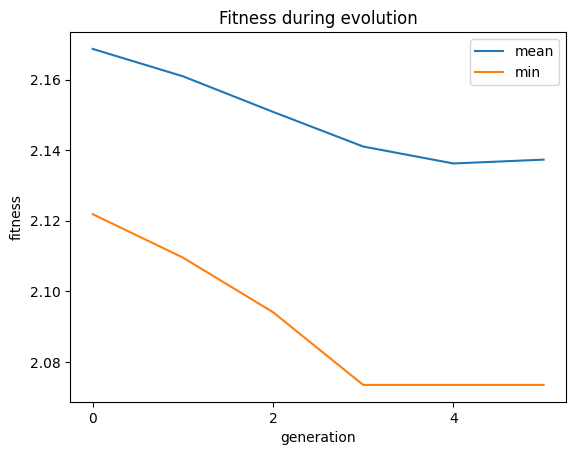

In [5]:
def plot_history(history, tick = 2):
    for target in ['mean', 'min']:
        plt.plot(history[target], label = target)
    plt.title('Fitness during evolution')
    plt.ylabel('fitness')
    plt.xlabel('generation')
    plt.xticks(np.arange(0, len(history['min']), tick))
    plt.legend()
    # h-line for integer
    for i in np.arange(math.ceil(min(history['min'])), int(max(history['mean']))+1):
        plt.axhline(y = i, color = 'g', linestyle = '-')
    plt.show()

plot_history(model.history)


/home/jaydatt/Desktop/work/container-packing/3D-Bin-Packing-Problem-with-BRKGA/code/plot.py:72: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.boxes_df = pd.concat([self.boxes_df ,pd.DataFrame({'box':self.boxes_num, 'sides': sides,


Container 0 :
Box 0 overlapped with box 1.
Box 0 overlapped with box 2.
Box 0 overlapped with box 3.
Box 0 overlapped with box 4.
Box 0 overlapped with box 5.
Box 0 overlapped with box 6.
Box 0 overlapped with box 7.
Box 0 overlapped with box 8.
Box 0 overlapped with box 9.
Box 0 overlapped with box 10.
Box 0 overlapped with box 11.
Box 0 overlapped with box 12.
Box 0 overlapped with box 13.
Box 0 overlapped with box 15.
Box 0 overlapped with box 17.
Box 0 overlapped with box 18.
Box 0 overlapped with box 20.
Box 0 overlapped with box 21.
Box 0 overlapped with box 23.
Box 0 overlapped with box 24.
Box 0 overlapped with box 25.
Box 0 overlapped with box 26.
Box 0 overlapped with box 27.
Box 0 overlapped with box 28.
Box 0 overlapped with box 29.
Box 0 overlapped with box 30.
Box 0 overlapped with box 31.
Box 0 overlapped with box 32.
Box 0 overlapped with box 33.
Box 0 overlapped with box 34.
Box 0 overlapped with box 35.
Box 0 overlapped with box 36.
Box 0 overlapped with box 38.
Box 0

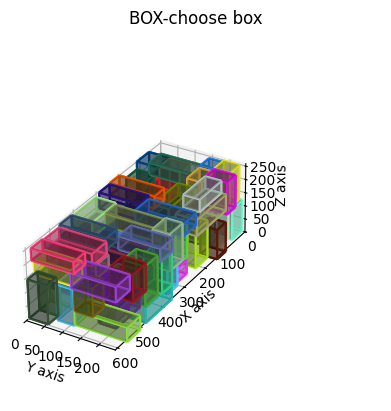

Container 1 :
Box 0 overlapped with box 1.
Box 0 overlapped with box 2.
Box 0 overlapped with box 3.
Box 0 overlapped with box 5.
Box 0 overlapped with box 6.
Box 1 overlapped with box 2.
Box 1 overlapped with box 3.
Box 1 overlapped with box 5.
Box 1 overlapped with box 6.
Box 2 overlapped with box 3.
Box 2 overlapped with box 4.
Box 2 overlapped with box 5.
Box 2 overlapped with box 6.
Box 2 overlapped with box 7.
Box 3 overlapped with box 4.
Box 3 overlapped with box 5.
Box 3 overlapped with box 6.
Box 3 overlapped with box 7.
Box 4 overlapped with box 6.
Box 4 overlapped with box 7.
Box 5 overlapped with box 6.
Box 6 overlapped with box 7.


/home/jaydatt/Desktop/work/container-packing/3D-Bin-Packing-Problem-with-BRKGA/code/plot.py:72: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.boxes_df = pd.concat([self.boxes_df ,pd.DataFrame({'box':self.boxes_num, 'sides': sides,


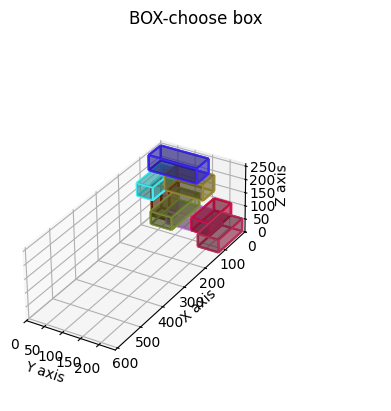

In [8]:
from plot import plot_3D

V = (610, 244, 259)
def draw(decoder):
    for i in range(decoder.num_opend_bins):
        container = plot_3D(V=V)
        for box in decoder.Bins[i].load_items:
            container.add_box(box[0], box[1], mode = 'EMS')
        print('Container',i, ':')
        container.findOverlapping()
        container.show()

draw(decoder)